#**Лабораторная работа: Модель Эрдёша-Реньи и распределения степеней узлов.**

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

###**1. Выполнить генерацию случайного графа по модели Эрдёша-Реньи. Написать функцию для создания сети с использованием модели Эрдеша-Реньи.**

Сеть (граф) Эрдеша-Реньи (ER-сеть) это такая сеть, когда каждая пара узлов соединена с вероятностью p. В пределе большого числа узлов N функция распределения степеней узлов имеет вид:

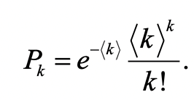

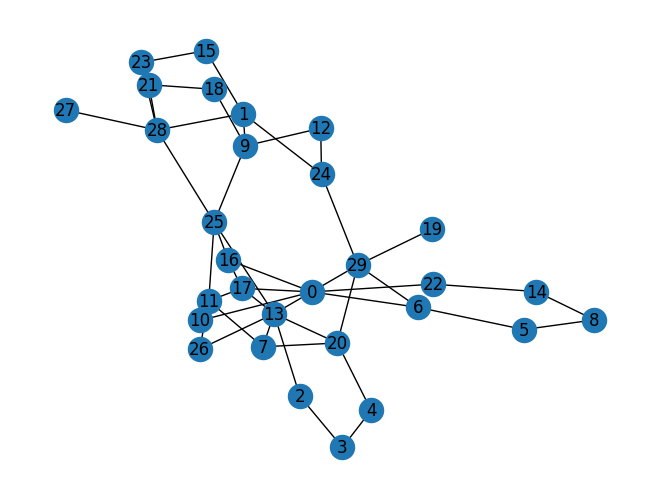

In [ ]:
def erdos_renyi_graph(N, p):
    G = nx.Graph()
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
    return G

N = 30
p = 0.1

graph = erdos_renyi_graph(N, p)

nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
graph.number_of_edges()

45

###**2.Создать граф с n=100, p=0.1. Для произвольной вершины вывести a) степень вершины, b) список соседних вершин, c) количество треугольников, в которые входит заданная вершина.**

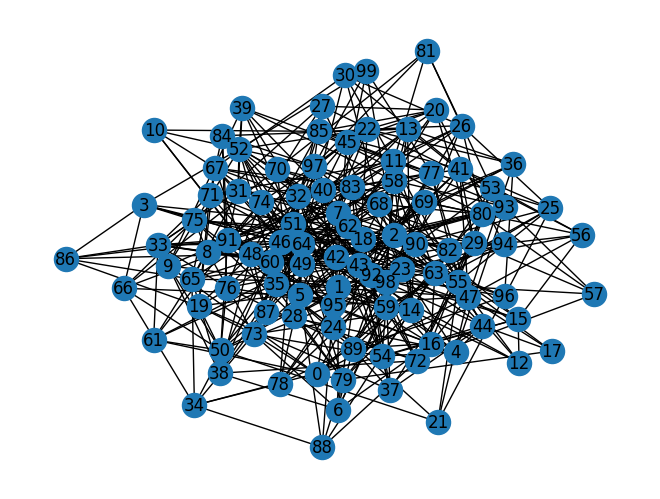

In [ ]:
N = 100
p = 0.1

graph = erdos_renyi_graph(N, p)

nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
node = np.random.choice(graph.nodes())
print(node)

95


In [ ]:
# Степень вершины
graph.degree[node]

14

In [ ]:
# Список соседних вершин
list(graph.neighbors(node))

[31, 32, 35, 47, 50, 51, 53, 60, 62, 76, 78, 88, 91, 94]

In [ ]:
# Количество треугольников, в которые входит заданная вершина
nx.triangles(graph, node)

8

###**3. Для двух произвольных вершин найдите кратчайшее расстояние и выведите кратчайший путь. Определить и вывести диаметр графа и степень кластеризации.**

Диаметр графа — это максимальное расстояние между любыми двумя его вершинами. Расстояние между двумя вершинами — наименьшее количество ребер в пути, концами которого являются эти вершины.

In [ ]:
first_node, second_node = np.random.choice(graph.nodes(), size=2, replace=False)

In [ ]:
first_node

30

In [ ]:
second_node

28

In [ ]:
# Кротчайший путь
nx.shortest_path(graph, source=first_node, target=second_node)

[30, 11, 46, 28]

In [ ]:
# Кротчайшее расстояние
nx.shortest_path_length(graph, source=first_node, target=second_node)

3

In [ ]:
# Диаметр графа
nx.diameter(graph)

4

In [ ]:
# Степень кластеризации
nx.average_clustering(graph)

0.10362230253406722

### **4. Вычислить и вывести степени узлов (см лаб.1), построить гистограмму распределения узлов, указать среднюю степень вершин.**

In [ ]:
node_degrees = dict(graph.degree())

sorted_keys = sorted(node_degrees.keys())
for key in sorted_keys:
    print(key, ":", node_degrees[key])

0 : 7
1 : 12
2 : 13
3 : 8
4 : 7
5 : 18
6 : 8
7 : 16
8 : 10
9 : 7
10 : 5
11 : 15
12 : 5
13 : 11
14 : 11
15 : 8
16 : 11
17 : 4
18 : 13
19 : 9
20 : 9
21 : 5
22 : 10
23 : 12
24 : 6
25 : 8
26 : 10
27 : 7
28 : 11
29 : 9
30 : 6
31 : 10
32 : 12
33 : 12
34 : 7
35 : 11
36 : 7
37 : 8
38 : 9
39 : 8
40 : 14
41 : 10
42 : 10
43 : 15
44 : 10
45 : 9
46 : 15
47 : 11
48 : 13
49 : 13
50 : 12
51 : 16
52 : 13
53 : 8
54 : 12
55 : 14
56 : 7
57 : 5
58 : 11
59 : 11
60 : 13
61 : 7
62 : 12
63 : 10
64 : 14
65 : 11
66 : 7
67 : 10
68 : 13
69 : 10
70 : 9
71 : 7
72 : 11
73 : 11
74 : 10
75 : 9
76 : 8
77 : 8
78 : 7
79 : 9
80 : 10
81 : 5
82 : 9
83 : 17
84 : 6
85 : 8
86 : 6
87 : 10
88 : 6
89 : 12
90 : 12
91 : 13
92 : 14
93 : 9
94 : 6
95 : 14
96 : 7
97 : 15
98 : 14
99 : 5


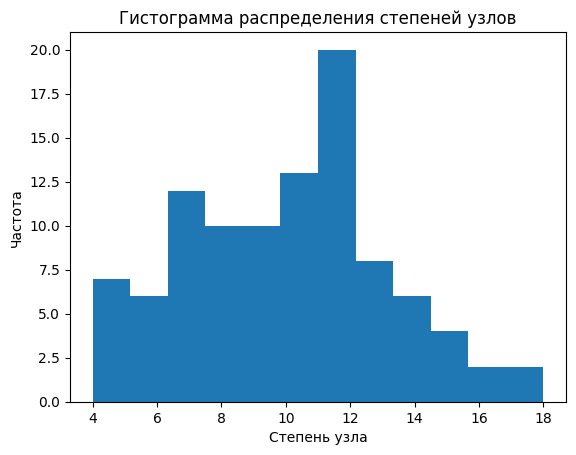

In [ ]:
plt.hist(node_degrees.values(), bins=12)
plt.title("Гистограмма распределения степеней узлов")
plt.xlabel("Степень узла")
plt.ylabel("Частота")
plt.show()

In [ ]:
# Средняя степень узлов
np.mean(list(node_degrees.values()))

9.98

### **5. Выполнить определение связанных компонент в графе.**

Компонент связности в графах — это максимальное подмножество вершин, каждая из которых связана с другими вершинами этого множества. То есть, внутри компоненты связности из любой вершины можно достигнуть любую другую вершину, двигаясь только по ребрам графа.

In [ ]:
connected_components = list(nx.connected_components(graph))

for i, component in enumerate(connected_components):
    print(f"Компонента {i + 1}: {component}")

Компонента 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


### **6. Выполнить проверку графа на фазовый переход: граф содержит несколько изолированных компонент, граф содержит одну связанную компоненту, граф не достиг фазового перехода.**

Фазовый переход в случайном графе Эрдёша-Реньи происходит, когда вероятность появления связей превышает определенный порог, что приводит к резкому изменению свойств графа.

In [ ]:
def check_phase_transition(graph):
    num_connected_components = nx.number_connected_components(graph)
    if num_connected_components > 1:
        print("Граф содержит несколько изолированных компонент.")
    elif num_connected_components == 1:
        print("Граф содержит одну связанную компоненту.")
    else:
        print("Граф не достиг фазового перехода.")

In [ ]:
N = 100

# Граф с вероятностью ниже порога
p_under = 0.01
graph_under = nx.erdos_renyi_graph(N, p_under)
check_phase_transition(graph_under)

Граф содержит несколько изолированных компонент.


In [ ]:
# Граф с вероятностью выше порога
p_above = 0.5
graph_above = nx.erdos_renyi_graph(N, p_above)
check_phase_transition(graph_above)

Граф содержит одну связанную компоненту.


### **7. Реализуйте функцию для создания случайной сети с помощью модели Вильсона-Хопкрофта. Сеть должна начинаться с одной вершины и постепенно увеличиваться путем добавления новых вершин и соединения их с существующими вершинами случайным образом. Визуализируйте результат.**

In [ ]:
import random

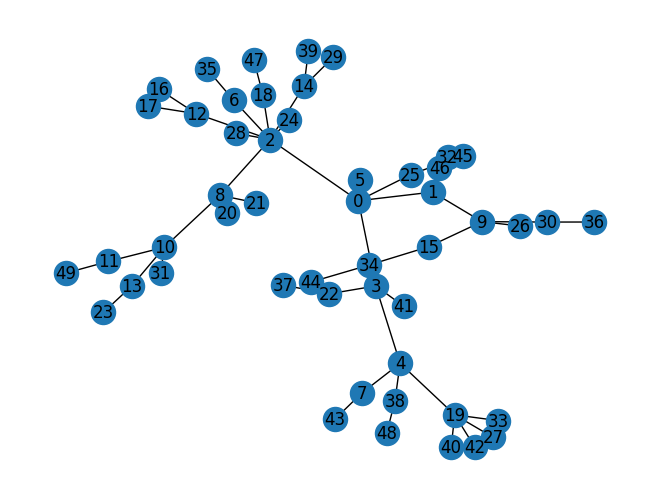

In [ ]:
def wilson_hopcroft_model(n):
    graph = nx.Graph()
    graph.add_node(0)

    all_nodes = [0]

    for i in range(1, n):
        current_node = random.choice(all_nodes)
        graph.add_node(i)
        graph.add_edge(i, current_node)
        all_nodes.append(i)

    return graph


graph = wilson_hopcroft_model(50)

nx.draw(graph, with_labels=True)
plt.show()

### **8. Создайте программу для создания графа с использованием модели Барабаши-Альберта. Начните с графа, содержащего m0 вершин, где каждая вершина соединена с другими m0-1 вершинами. Затем добавьте n новых вершин, каждая из которых соединена с m вершинами, пропорционально их степени. Визуализируйте полученный граф.**

In [ ]:
def barabasi_albert_model(m0, m, n):
    graph = nx.complete_graph(m0)
    target_nodes = list(range(m0))

    for i in range(m0, m0 + n):
        new_edges = random.sample(target_nodes, m)
        graph.add_node(i)
        for node in new_edges:
            graph.add_edge(i, node)
        target_nodes.extend([i] * m)

    return graph

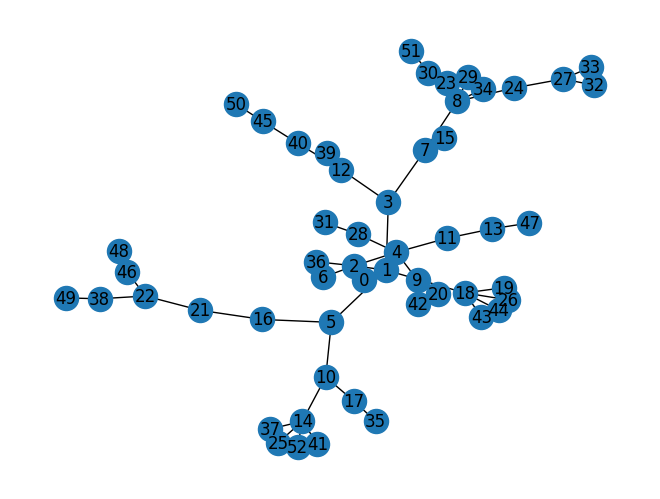

In [ ]:
m0 = 3  # Начальное кол-во вершин
m = 1   # Кол-во связей
n = 50  # Кол-во новых вершин

graph = barabasi_albert_model(m0, m, n)

nx.draw(graph, with_labels=True)
plt.show()

### **9. Напишите функцию для создания случайной сети с использованием модели случайного роста сети. Сеть должна начинаться с графа без рёбер и N вершинами. Затем добавьте случайные рёбра между вершинами с вероятностью p. Визуализируйте полученную сеть.**

In [ ]:
def random_growth_network(N, p):
    graph = nx.Graph()
    graph.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i + 1, N):
            if random.random() < p:
                graph.add_edge(i, j)

    return graph

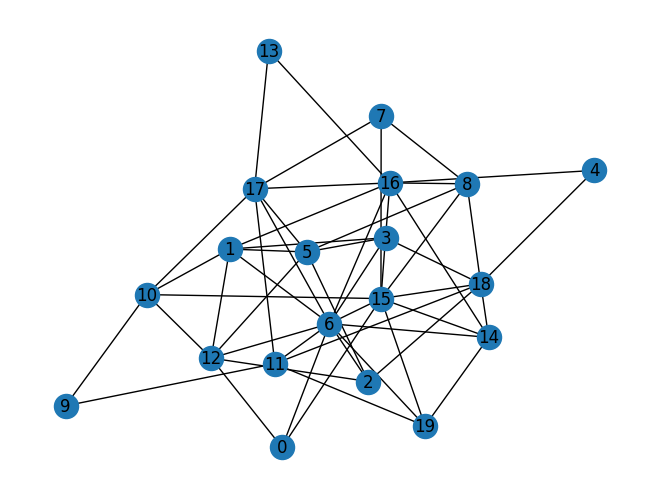

In [ ]:
N = 20  # Количество вершин
p = 0.3  # Вероятность появления ребра между вершинами

graph = random_growth_network(N, p)

nx.draw(graph, with_labels=True)
plt.show()

### **10. Реализуйте функцию для создания случайной сети с использованием модели Ваттса-Строгатца. Сеть должна начинаться с регулярной решётки с N вершинами и k ближайшими соседями, а затем некоторые рёбра должны быть переподключены случайным образом с вероятностью p. Визуализируйте результат.**

In [ ]:
def watts_strogatz(n, p):
    g = nx.circulant_graph(n, [1, 2])
    degrees = dict(nx.degree(g))
    k = int(sum(degrees.values()) / n)
    nodes = list(g.nodes())

    for node in range(n):
        neighbors = list(g.neighbors(node))[:k // 2]
        for neighbor in neighbors:
            prob = np.random.uniform()
            if prob < p:
                g.remove_edge(node, neighbor)
                new = random.choice(list(set(nodes) - set(g.neighbors(node))))
                g.add_edge(new, node)

    return g

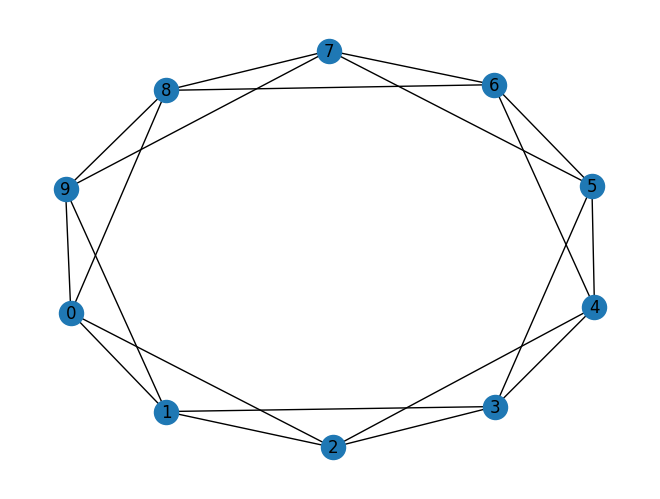

In [ ]:
graph = watts_strogatz(10, 0)

nx.draw(graph, with_labels=True)
plt.show()

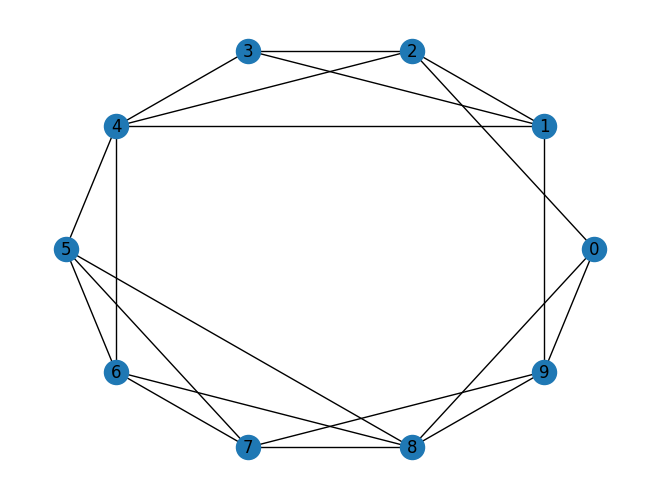

In [ ]:
graph = watts_strogatz(10, 0.1)
pos = nx.circular_layout(graph)

nx.draw(graph, pos, with_labels = True)
plt.show()

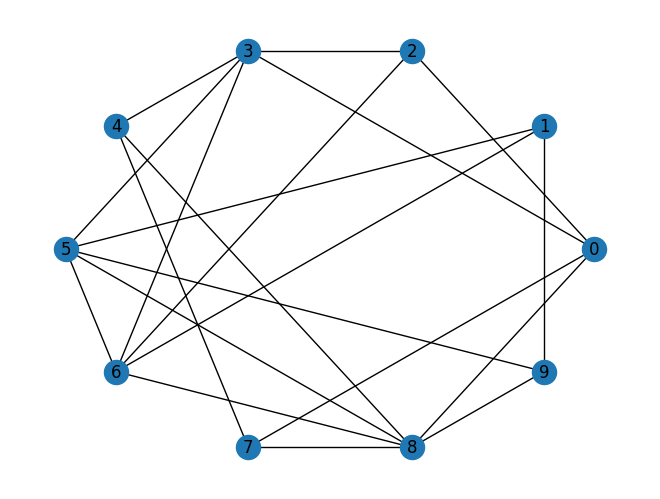

In [ ]:
graph = watts_strogatz(10, 0.5)
pos = nx.circular_layout(graph)

nx.draw(graph, pos, with_labels = True)
plt.show()

In [ ]:
mean_len = nx.average_shortest_path_length(graph)
mean_len

1.6444444444444444